In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [169]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

In [170]:
#  pd.read_table 
cols = ['Raw']
dfmoviedat = pd.read_table("movies.dat", encoding = "ISO-8859-1", header=None, names=cols)
dfmoviedat

cols = ['Raw']
dfratingsdat = pd.read_table("ratings.dat", encoding = "ISO-8859-1", header=None, names=cols)
dfratingsdat

cols = ['Raw']
dfusersdat = pd.read_table("users.dat", encoding = "ISO-8859-1", header=None, names=cols)
dfusersdat

,Raw
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy
...,...
3878,3948::Meet the Parents (2000)::Comedy
3879,3949::Requiem for a Dream (2000)::Drama
3880,3950::Tigerland (2000)::Drama
3881,3951::Two Family House (2000)::Drama


,Raw
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291
...,...
1000204,6040::1091::1::956716541
1000205,6040::1094::5::956704887
1000206,6040::562::5::956704746
1000207,6040::1096::4::956715648


,Raw
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455
...,...
6035,6036::F::25::15::32603
6036,6037::F::45::1::76006
6037,6038::F::56::1::14706
6038,6039::F::45::0::01060


In [171]:
dfmoviedat[['MovieID','Title','Genres']] = dfmoviedat['Raw'].str.split(pat='::', expand = True)
dfmoviedat

dfratingsdat[['UserID', 'MovieID', 'Rating','Timestamp']] = dfratingsdat['Raw'].str.split(pat = '::', expand = True)
dfratingsdat


dfusersdat[['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']] = dfusersdat['Raw'].str.split(pat = '::', expand = True)
dfusersdat

,Raw,MovieID,Title,Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy,1,Toy Story (1995),Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance,3,Grumpier Old Men (1995),Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama,4,Waiting to Exhale (1995),Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
3878,3948::Meet the Parents (2000)::Comedy,3948,Meet the Parents (2000),Comedy
3879,3949::Requiem for a Dream (2000)::Drama,3949,Requiem for a Dream (2000),Drama
3880,3950::Tigerland (2000)::Drama,3950,Tigerland (2000),Drama
3881,3951::Two Family House (2000)::Drama,3951,Two Family House (2000),Drama


,Raw,UserID,MovieID,Rating,Timestamp
0,1::1193::5::978300760,1,1193,5,978300760
1,1::661::3::978302109,1,661,3,978302109
2,1::914::3::978301968,1,914,3,978301968
3,1::3408::4::978300275,1,3408,4,978300275
4,1::2355::5::978824291,1,2355,5,978824291
...,...,...,...,...,...
1000204,6040::1091::1::956716541,6040,1091,1,956716541
1000205,6040::1094::5::956704887,6040,1094,5,956704887
1000206,6040::562::5::956704746,6040,562,5,956704746
1000207,6040::1096::4::956715648,6040,1096,4,956715648


,Raw,UserID,Gender,Age,Occupation,Zip-code
0,1::F::1::10::48067,1,F,1,10,48067
1,2::M::56::16::70072,2,M,56,16,70072
2,3::M::25::15::55117,3,M,25,15,55117
3,4::M::45::7::02460,4,M,45,7,02460
4,5::M::25::20::55455,5,M,25,20,55455
...,...,...,...,...,...,...
6035,6036::F::25::15::32603,6036,F,25,15,32603
6036,6037::F::45::1::76006,6037,F,45,1,76006
6037,6038::F::56::1::14706,6038,F,56,1,14706
6038,6039::F::45::0::01060,6039,F,45,0,01060


In [172]:
#drop the 'Raw' column

dfmoviedat2 = dfmoviedat.drop(['Raw'], axis=1)
dfmoviedat2

dfratingsdat2 = dfratingsdat.drop(['Raw'], axis=1)
dfratingsdat2

dfusersdat2 = dfusersdat.drop(['Raw'], axis=1)
dfusersdat2


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [173]:
print('Dataframe: dfmoviedat2 datatype')
dfmoviedat2.dtypes

print('Dataframe: dfratingsdat2.dtypes')
dfratingsdat2.dtypes

print('Dataframe: dfusersdat2 datatype')
dfusersdat2.dtypes

Dataframe: dfmoviedat2 datatype


MovieID    object
Title      object
Genres     object
dtype: object

Dataframe: dfratingsdat2.dtypes


UserID       object
MovieID      object
Rating       object
Timestamp    object
dtype: object

Dataframe: dfusersdat2 datatype


UserID        object
Gender        object
Age           object
Occupation    object
Zip-code      object
dtype: object

In [174]:
#Change the datatype for dfmoviedat2
dfmoviedat2["MovieID"] = dfmoviedat2["MovieID"].astype('int32')
dfmoviedat2

#Change the datatype for dfratingsdat2
dfratingsdat2[['UserID', 'MovieID', 'Rating']] = dfratingsdat2[['UserID', 'MovieID', 'Rating']].apply(lambda x: x.astype(int))
dfratingsdat2

dfratingsdat2['Timestamp'] = pd.to_datetime(dfratingsdat2['Timestamp'], unit = 's')
dfratingsdat2

#Change the datatype for dfusersdat2
dfusersdat2[['UserID', 'Age', 'Occupation']] = dfusersdat2[['UserID', 'Age', 'Occupation']].apply(lambda x: x.astype(int))
dfusersdat2

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11
...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41
1000205,6040,1094,5,2000-04-25 23:21:27
1000206,6040,562,5,2000-04-25 23:19:06
1000207,6040,1096,4,2000-04-26 02:20:48


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [175]:
print('Dataframe after changing datatype: dfmoviedat2 datatype')
dfmoviedat2.dtypes

print('Dataframe after changing datatype: dfratingsdat2.dtypes')
dfratingsdat2.dtypes

print('Dataframe after changing datatype: dfusersdat2 datatype')
dfusersdat2.dtypes

Dataframe after changing datatype: dfmoviedat2 datatype


MovieID     int32
Title      object
Genres     object
dtype: object

Dataframe after changing datatype: dfratingsdat2.dtypes


UserID                int32
MovieID               int32
Rating                int32
Timestamp    datetime64[ns]
dtype: object

Dataframe after changing datatype: dfusersdat2 datatype


UserID         int32
Gender        object
Age            int32
Occupation     int32
Zip-code      object
dtype: object

In [176]:
dfmoviedat2.info()
dfmoviedat2.describe()
dfmoviedat2.columns
dfmoviedat2.isnull().sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int32 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


Index(['MovieID', 'Title', 'Genres'], dtype='object')

<bound method NDFrame._add_numeric_operations.<locals>.sum of       MovieID  Title  Genres
0       False  False   False
1       False  False   False
2       False  False   False
3       False  False   False
4       False  False   False
...       ...    ...     ...
3878    False  False   False
3879    False  False   False
3880    False  False   False
3881    False  False   False
3882    False  False   False

[3883 rows x 3 columns]>

In [177]:
print('Check for missing values in dfmoviedat2:')
dfmoviedat2.isnull().values.any()
dfmoviedat2.isnull().values.sum()
dfmoviedat2.isnull().values.sum().sum()

print('Check for missing values in dfratingsdat2:')
dfratingsdat2.isnull().values.any()
dfratingsdat2.isnull().values.sum()
dfratingsdat2.isnull().values.sum().sum()

print('Check for missing values in dfusersdat2:')
dfusersdat2.isnull().values.any()
dfusersdat2.isnull().values.sum()
dfusersdat2.isnull().values.sum().sum()

Check for missing values in dfmoviedat2:


False

0

0

Check for missing values in dfratingsdat2:


False

0

0

Check for missing values in dfusersdat2:


False

0

0

In [178]:
dfmoviedat2.info()
print('=========================================================')
print('=========================================================')
dfratingsdat2.info()
print('=========================================================')
print('=========================================================')
dfusersdat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int32 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   UserID     1000209 non-null  int32         
 1   MovieID    1000209 non-null  int32         
 2   Rating     1000209 non-null  int32         
 3   Timestamp  1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3)
memory usage: 19.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Use

# Merge Dataframes

In [179]:
dfratings_merge_users = pd.merge(dfratingsdat2, dfusersdat2, how="left", on=["UserID"])
dfratings_merge_users

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,M,25,6,11106
1000205,6040,1094,5,2000-04-25 23:21:27,M,25,6,11106
1000206,6040,562,5,2000-04-25 23:19:06,M,25,6,11106
1000207,6040,1096,4,2000-04-26 02:20:48,M,25,6,11106


In [180]:
dfratings_merge_users_merge_movie = pd.merge(dfratings_merge_users, dfmoviedat2, how="left", on=["MovieID"])
dfratings_merge_users_merge_movie

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,2000-04-25 23:21:27,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,2000-04-25 23:19:06,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,2000-04-26 02:20:48,M,25,6,11106,Sophie's Choice (1982),Drama


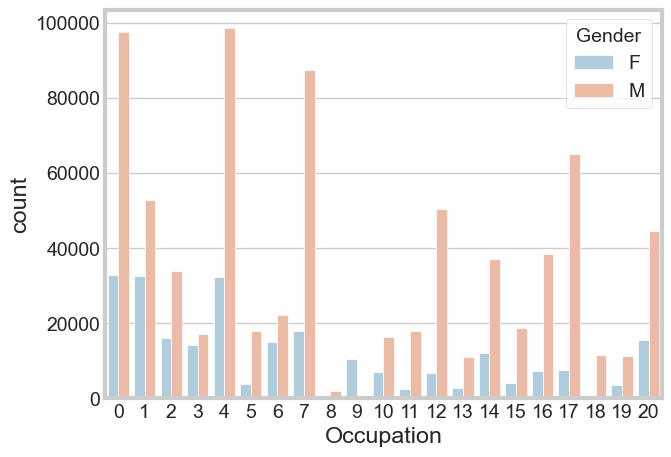

In [181]:
sns.set_style('whitegrid');
sns.countplot(x='Occupation',hue='Gender',data=dfratings_merge_users_merge_movie,palette='RdBu_r');

In [182]:
dfratings_merge_users_merge_movie.isnull().values.sum() #check for null values

0

<AxesSubplot: >

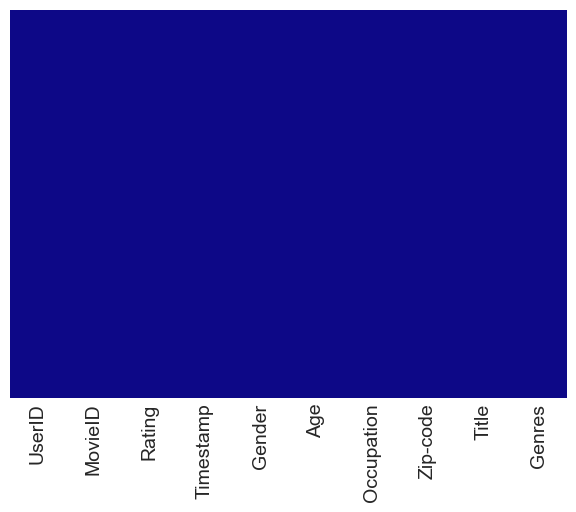

In [183]:
#using heatmap to check for null values
sns.heatmap(dfratings_merge_users_merge_movie.isnull(),yticklabels=False,cbar=False,cmap='plasma') 

<div class="alert alert-success">
    <b><font color="#6495ED", size="+3">Explore the datasets using visual representations</font><b>
</div>

### 1. User Age Distribution

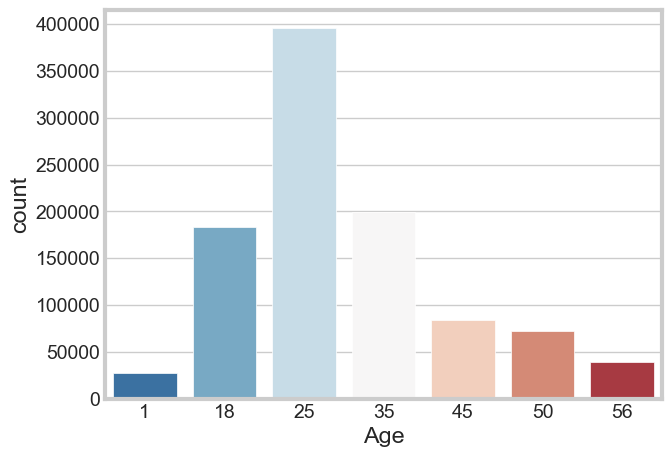

In [19]:
# Overall Age Group Distribution
sns.set_style('whitegrid')
sns.countplot(x='Age',data=dfratings_merge_users_merge_movie,palette='RdBu_r');

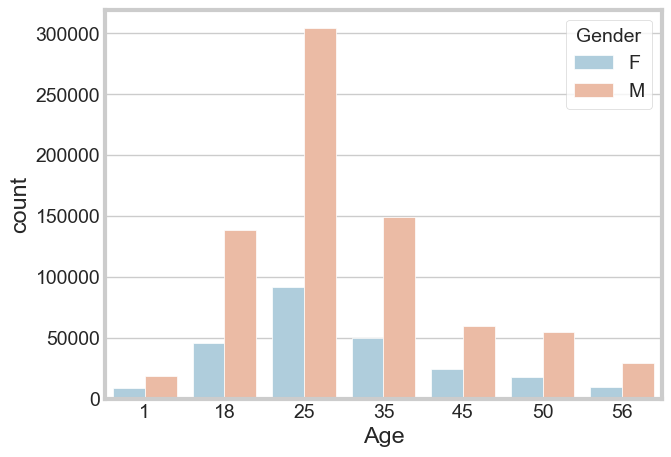

In [20]:
# Age Group Distribution by Gender
sns.set_style('whitegrid')
sns.countplot(x='Age', hue='Gender', data=dfratings_merge_users_merge_movie,palette='RdBu_r');

#

### 2. User rating of the movie “Toy Story”

In [21]:
toy_story = dfratings_merge_users_merge_movie[dfratings_merge_users_merge_movie['Title'] == 'Toy Story (1995)']
toy_story

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
40,1,1,5,2001-01-06 23:37:48,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
469,6,1,4,2000-12-31 04:30:08,F,50,9,55117,Toy Story (1995),Animation|Children's|Comedy
581,8,1,4,2000-12-31 03:31:36,M,25,12,11413,Toy Story (1995),Animation|Children's|Comedy
711,9,1,5,2000-12-31 01:25:52,M,25,17,61614,Toy Story (1995),Animation|Children's|Comedy
837,10,1,5,2000-12-31 01:34:34,F,35,1,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
997248,6022,1,5,2000-04-26 13:29:23,M,25,17,57006,Toy Story (1995),Animation|Children's|Comedy
997541,6025,1,5,2000-04-27 05:21:07,F,25,1,32607,Toy Story (1995),Animation|Children's|Comedy
998170,6032,1,4,2000-04-26 03:02:07,M,45,7,55108,Toy Story (1995),Animation|Children's|Comedy
998360,6035,1,4,2000-04-26 01:34:09,F,25,1,78734,Toy Story (1995),Animation|Children's|Comedy


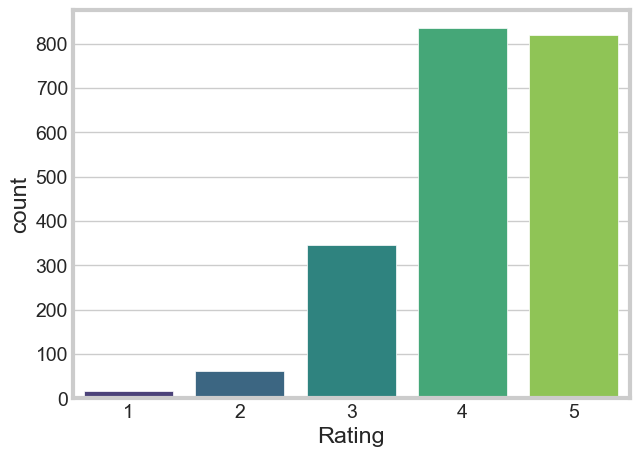

In [22]:
# Rating distribution for toy Story
sns.set_style('whitegrid');
sns.countplot(x='Rating', data=toy_story, palette="viridis");

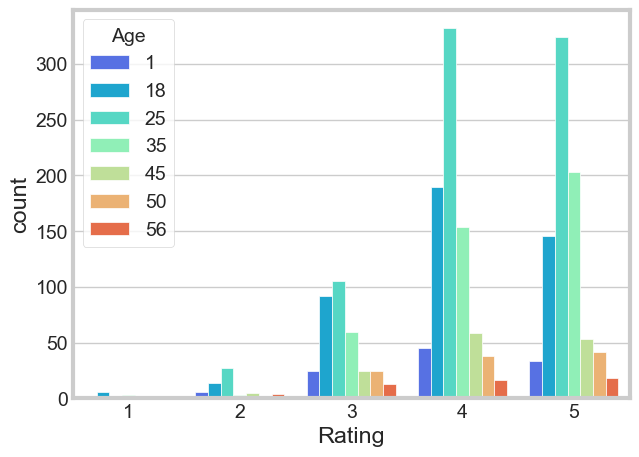

In [186]:
# Ratings for the various Age Groups
sns.set_style('whitegrid');
sns.countplot(x='Rating', hue='Age', data=toy_story,palette='rainbow');

##

### 3. Top 25 movies by viewership rating

In [24]:
viewership_rating = dfratings_merge_users_merge_movie.groupby('Title').count()
viewership_rating

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Genres
Title,,,,,,,,,
"$1,000,000 Duck (1971)",37,37,37,37,37,37,37,37,37
'Night Mother (1986),70,70,70,70,70,70,70,70,70
'Til There Was You (1997),52,52,52,52,52,52,52,52,52
"'burbs, The (1989)",303,303,303,303,303,303,303,303,303
...And Justice for All (1979),199,199,199,199,199,199,199,199,199
...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",29,29,29,29,29,29,29,29,29
Zero Effect (1998),301,301,301,301,301,301,301,301,301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2,2,2,2,2,2,2,2,2


In [25]:
viewership_rating_ascending = viewership_rating.sort_values(['Rating'], ascending=False)
viewership_rating_ascending

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Genres
Title,,,,,,,,,
American Beauty (1999),3428,3428,3428,3428,3428,3428,3428,3428,3428
Star Wars: Episode IV - A New Hope (1977),2991,2991,2991,2991,2991,2991,2991,2991,2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990,2990,2990,2990,2990,2990,2990,2990,2990
Star Wars: Episode VI - Return of the Jedi (1983),2883,2883,2883,2883,2883,2883,2883,2883,2883
Jurassic Park (1993),2672,2672,2672,2672,2672,2672,2672,2672,2672
...,...,...,...,...,...,...,...,...,...
Target (1995),1,1,1,1,1,1,1,1,1
I Don't Want to Talk About It (De eso no se habla) (1993),1,1,1,1,1,1,1,1,1
An Unforgettable Summer (1994),1,1,1,1,1,1,1,1,1


In [26]:
viewership_rating_ascending_add_index = viewership_rating_ascending.reset_index()
viewership_rating_ascending_add_index

,Title,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Genres
0,American Beauty (1999),3428,3428,3428,3428,3428,3428,3428,3428,3428
1,Star Wars: Episode IV - A New Hope (1977),2991,2991,2991,2991,2991,2991,2991,2991,2991
2,Star Wars: Episode V - The Empire Strikes Back...,2990,2990,2990,2990,2990,2990,2990,2990,2990
3,Star Wars: Episode VI - Return of the Jedi (1983),2883,2883,2883,2883,2883,2883,2883,2883,2883
4,Jurassic Park (1993),2672,2672,2672,2672,2672,2672,2672,2672,2672
...,...,...,...,...,...,...,...,...,...,...
3701,Target (1995),1,1,1,1,1,1,1,1,1
3702,I Don't Want to Talk About It (De eso no se ha...,1,1,1,1,1,1,1,1,1
3703,An Unforgettable Summer (1994),1,1,1,1,1,1,1,1,1
3704,Never Met Picasso (1996),1,1,1,1,1,1,1,1,1


In [184]:
top25 = viewership_rating_ascending_add_index.loc[0:24, ['Title', 'Rating']]
top25

top25.rename(columns = {'Rating':'Viewership Count'}, inplace = True)
top25

,Title,Viewership Count
0,American Beauty (1999),3428
1,Star Wars: Episode IV - A New Hope (1977),2991
2,Star Wars: Episode V - The Empire Strikes Back...,2990
3,Star Wars: Episode VI - Return of the Jedi (1983),2883
4,Jurassic Park (1993),2672
5,Saving Private Ryan (1998),2653
6,Terminator 2: Judgment Day (1991),2649
7,"Matrix, The (1999)",2590
8,Back to the Future (1985),2583
9,"Silence of the Lambs, The (1991)",2578


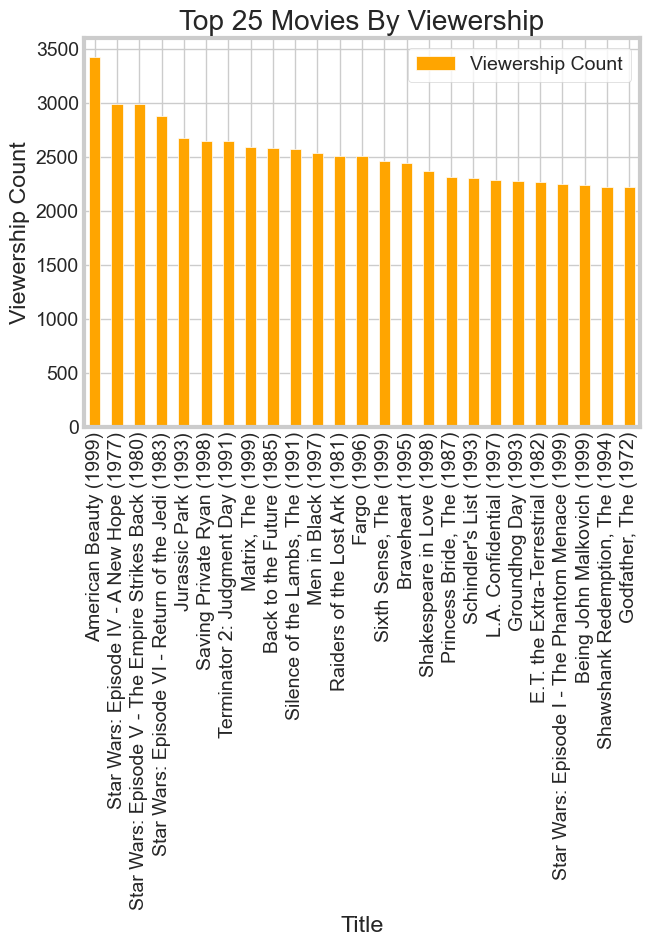

In [28]:
# Bar Chart of Title vs Viewership
top25.plot(x='Title', y='Viewership Count', style='o',kind='bar',color="orange");
plt.title('Top 25 Movies By Viewership');
plt.xlabel('Title');
plt.ylabel('Viewership Count');  
plt.show();

#

### 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [185]:
user_2696 = dfratings_merge_users_merge_movie[dfratings_merge_users_merge_movie['UserID'] == 2696]
user_2696_final = user_2696.loc[: , ['Rating', 'Title', 'Genres']]
user_2696_final

,Rating,Title,Genres
440667,4,"Shining, The (1980)",Horror
440668,2,Back to the Future (1985),Comedy|Sci-Fi
440669,4,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
440670,4,"Game, The (1997)",Mystery|Thriller
440671,2,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller
440672,4,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller
440673,4,Wild Things (1998),Crime|Drama|Mystery|Thriller
440674,4,"Perfect Murder, A (1998)",Mystery|Thriller
440675,5,Lone Star (1996),Drama|Mystery
440676,2,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller


In [30]:
# Total number of movies reviewed by user id = 2696
user_2696_final['Title'].count()

20

In [31]:
# Average rating by user id = 2696
user_2696_final['Rating'].mean()

3.3

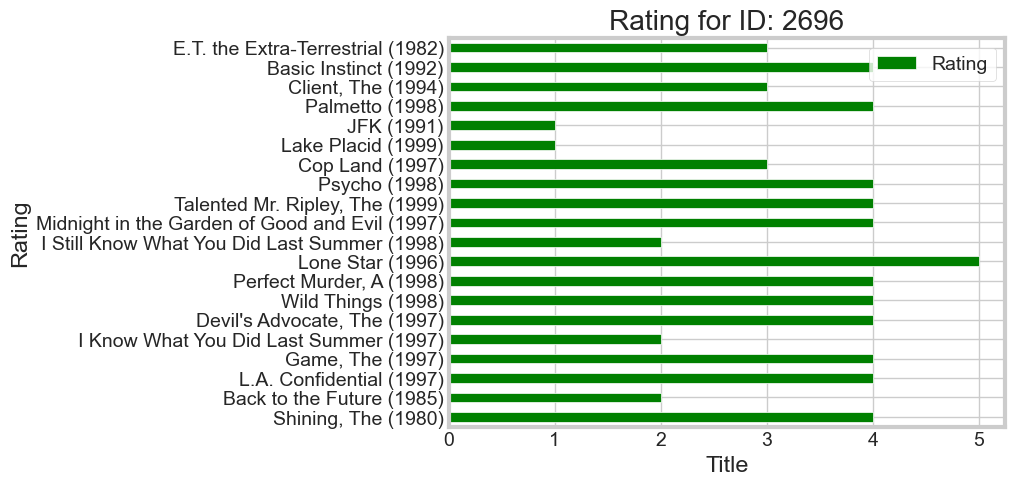

In [32]:
user_2696.plot(x='Title', y='Rating', style='o',kind='barh',color="green");
plt.title('Rating for ID: 2696');
plt.xlabel('Title');
plt.ylabel('Rating');  
plt.show();

#

#


<div class="alert alert-success">
    <b><font color="#3CB371", size="+3">FEATURE ENGINEERING</font><b>
</div>

### 1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [188]:
dfratings_merge_users_merge_movie[['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6']] = dfratings_merge_users_merge_movie['Genres'].str.split("|", expand = True)
dfratings_merge_users_merge_movie

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Drama,None,None,None,None,None
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,Animation,Children's,Musical,None,None,None
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance,Musical,Romance,None,None,None,None
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama,Drama,None,None,None,None,None
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,M,25,6,11106,Weekend at Bernie's (1989),Comedy,Comedy,None,None,None,None,None
1000205,6040,1094,5,2000-04-25 23:21:27,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War,Drama,Romance,War,None,None,None
1000206,6040,562,5,2000-04-25 23:19:06,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama,Comedy,Drama,None,None,None,None
1000207,6040,1096,4,2000-04-26 02:20:48,M,25,6,11106,Sophie's Choice (1982),Drama,Drama,None,None,None,None,None


In [34]:
dfratings_merge_users_merge_movie[dfratings_merge_users_merge_movie.columns]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Drama,None,None,None,None,None
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,Animation,Children's,Musical,None,None,None
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance,Musical,Romance,None,None,None,None
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama,Drama,None,None,None,None,None
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,M,25,6,11106,Weekend at Bernie's (1989),Comedy,Comedy,None,None,None,None,None
1000205,6040,1094,5,2000-04-25 23:21:27,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War,Drama,Romance,War,None,None,None
1000206,6040,562,5,2000-04-25 23:19:06,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama,Comedy,Drama,None,None,None,None
1000207,6040,1096,4,2000-04-26 02:20:48,M,25,6,11106,Sophie's Choice (1982),Drama,Drama,None,None,None,None,None


In [190]:
dfratings_merge_users_merge_movie_unique = pd.unique(dfratings_merge_users_merge_movie[['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6']].values.ravel())

In [191]:
print('Unique Genres:', dfratings_merge_users_merge_movie_unique)

Unique Genres: ['Drama' None 'Animation' "Children's" 'Musical' 'Romance' 'Comedy'
 'Action' 'Adventure' 'Fantasy' 'Sci-Fi' 'War' 'Thriller' 'Crime'
 'Mystery' 'Western' 'Horror' 'Film-Noir' 'Documentary']


In [37]:
total_number_of_unique_genres = len(dfratings_merge_users_merge_movie_unique)
print('The total number of unique genres:', total_number_of_unique_genres)

The total number of unique genres: 19


#

### 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [38]:
dfratings_merge_users_merge_movie2 = dfratings_merge_users_merge_movie.drop(['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6'], axis=1)
dfratings_merge_users_merge_movie2

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,2000-04-25 23:21:27,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,2000-04-25 23:19:06,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,2000-04-26 02:20:48,M,25,6,11106,Sophie's Choice (1982),Drama


In [39]:
df_one_hot_encoding = dfratings_merge_users_merge_movie2['Genres'].str.get_dummies(sep = '|')
df_one_hot_encoding

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1000205,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1000206,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1000207,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
final_df = pd.concat([dfratings_merge_users_merge_movie2 , df_one_hot_encoding], axis = 1)

pd.set_option('display.max_columns', None)
final_df.head(5)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#

### 3. Determine the features affecting the ratings of any particular movie.


In [192]:
final_df_2 = final_df.drop(['UserID', 'MovieID','Timestamp', 'Zip-code','Title', 'Genres'], axis=1)
final_df_2

final_df_2.dtypes

,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,3,F,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,F,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,4,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,F,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,1,M,25,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1000205,5,M,25,6,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1000206,5,M,25,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1000207,4,M,25,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Rating          int32
Gender         object
Age             int32
Occupation      int32
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [193]:
#Label encoding. To change 'M' & 'F' from 'Gender' column to '0' & '1'
from sklearn.preprocessing import LabelEncoder
var_mod=['Gender']
le=LabelEncoder()
for i in var_mod:
    final_df_2[i]=le.fit_transform(final_df_2[i])

final_df_2

,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,0,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,3,0,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,0,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,4,0,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,1,1,25,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1000205,5,1,25,6,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1000206,5,1,25,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1000207,4,1,25,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [194]:
corrmat = final_df_2.corr()
corrmat

,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Rating,1.000000,-0.019861,0.056869,0.006753,-0.047633,-0.036718,0.019670,-0.039829,-0.039622,0.033446,0.028098,0.122561,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311
Gender,-0.019861,1.000000,-0.003189,0.114974,0.094380,0.038645,-0.017719,-0.031662,-0.040758,0.027065,0.000234,-0.052390,0.002806,0.005152,0.036566,-0.038051,-0.000905,-0.091272,0.072372,0.038039,0.025636,0.026397
Age,0.056869,-0.003189,1.000000,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,-0.007931,0.004407,0.063856,-0.024222,0.033495,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177
Occupation,0.006753,0.114974,0.078371,1.000000,0.018347,0.014309,-0.003834,-0.006906,-0.006149,0.002821,-0.002689,-0.012326,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924
Action,-0.047633,0.094380,-0.030975,0.018347,1.000000,0.374961,-0.110294,-0.141314,-0.268092,0.088519,-0.052565,-0.202415,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242
Adventure,-0.036718,0.038645,-0.016730,0.014309,0.374961,1.000000,0.004732,0.098283,-0.124960,-0.045924,-0.035109,-0.194570,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964
Animation,0.019670,-0.017719,-0.047020,-0.003834,-0.110294,0.004732,1.000000,0.576204,0.018544,-0.062520,-0.018991,-0.154479,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908
Children's,-0.039829,-0.031662,-0.052858,-0.006906,-0.141314,0.098283,0.576204,1.000000,0.058711,-0.081977,-0.024901,-0.135707,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269
Comedy,-0.039622,-0.040758,-0.044046,-0.006149,-0.268092,-0.124960,0.018544,0.058711,1.000000,-0.078030,-0.040697,-0.249840,-0.006010,-0.101425,-0.093064,0.030566,-0.105346,0.112843,-0.187079,-0.299501,-0.127101,0.007927
Crime,0.033446,0.027065,-0.007931,0.002821,0.088519,-0.045924,-0.062520,-0.081977,-0.078030,1.000000,-0.026243,0.070479,-0.033745,0.136237,-0.047899,-0.061179,0.080093,-0.073320,-0.083730,0.115095,-0.079715,-0.042711


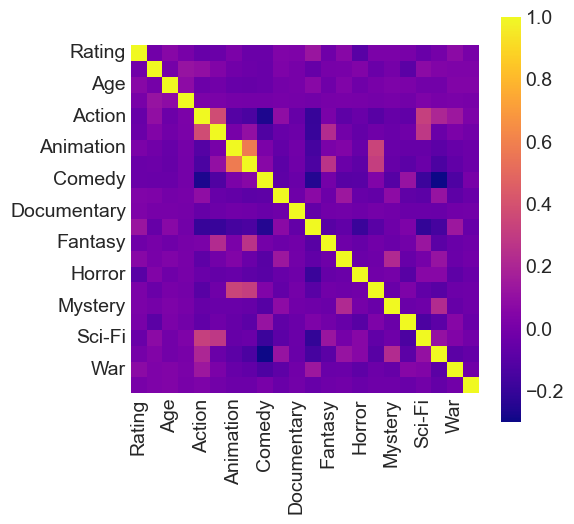

In [199]:
#correlation matrix
corrmat = final_df_2.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1.0, square=True, cmap = 'plasma');

In [198]:
#These are the parameters affecting the ratings of any particular movie
print(final_df_2.columns)

Index(['Rating', 'Gender', 'Age', 'Occupation', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


#

### 4. Develop an appropriate model to predict the movie ratings

##### Linear Regression with Standard Scaler

In [88]:
X = final_df_2.drop('Rating', axis = 1)
y = final_df_2['Rating']

X
y

,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,1,25,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1000205,1,25,6,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1000206,1,25,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1000207,1,25,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


0          5
1          3
2          3
3          4
4          5
          ..
1000204    1
1000205    5
1000206    5
1000207    4
1000208    4
Name: Rating, Length: 1000209, dtype: int32

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

X_train
y_train
X_test
y_test

,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
692311,1,35,17,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
720165,1,25,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
352534,1,25,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
556643,0,25,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
848048,1,25,11,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864087,1,25,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
778087,1,35,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
210755,1,35,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
56088,0,18,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


692311    5
720165    5
352534    3
556643    4
848048    4
         ..
864087    4
778087    4
210755    5
56088     5
824840    5
Name: Rating, Length: 800167, dtype: int32

,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
802987,1,35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
700292,1,45,17,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
439922,1,25,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
747897,1,25,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
907129,1,25,15,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584268,1,25,18,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
538959,1,25,7,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
350303,1,25,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
336914,1,25,14,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


802987    3
700292    3
439922    4
747897    4
907129    3
         ..
584268    3
538959    5
350303    4
336914    5
258733    2
Name: Rating, Length: 200042, dtype: int32

In [90]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

StandardScaler()

In [91]:
model = LinearRegression()
model.fit(X_train_scaler, y_train)

LinearRegression()

In [92]:
#show data from test_predictions. 
test_predictions = model.predict(X_test_scaler)
test_predictions

#Show data from y_test 
y_test

#Construct a dataframe comparing 'y_test' & 'test_predictions'
prediction_df = pd.DataFrame({'y_test': y_test, 'Test_Prediction': test_predictions})
prediction_df

array([3.4910386 , 4.07979031, 3.71008821, ..., 3.23784784, 3.06191863,
       3.59892291])

802987    3
700292    3
439922    4
747897    4
907129    3
         ..
584268    3
538959    5
350303    4
336914    5
258733    2
Name: Rating, Length: 200042, dtype: int32

,y_test,Test_Prediction
802987,3,3.491039
700292,3,4.079790
439922,4,3.710088
747897,4,3.449129
907129,3,3.630889
...,...,...
584268,3,3.637028
538959,5,3.465450
350303,4,3.237848
336914,5,3.061919


In [93]:
# To determine the intercept
model.intercept_

# To find the coefficient
model.coef_

3.5816848232931378

array([-0.01455933,  0.04659921,  0.00803925, -0.04406879,  0.00405802,
        0.07361737, -0.08154053, -0.0073064 ,  0.02550649,  0.03657926,
        0.10939317,  0.01294064,  0.05889831, -0.07812454,  0.03141892,
        0.00142261, -0.00419583, -0.00978258,  0.02372552,  0.07484429,
        0.01581475])

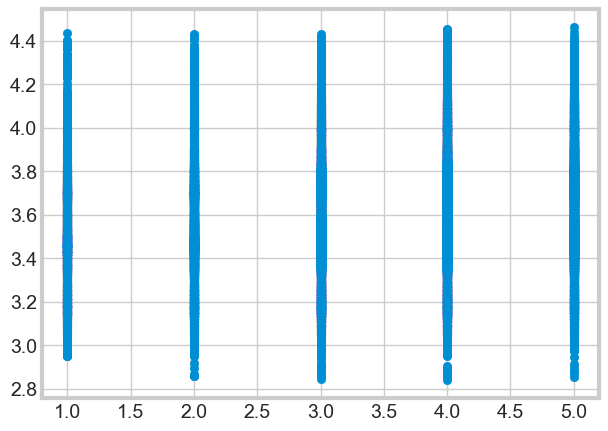

In [94]:
plt.scatter(y_test, test_predictions)

In [95]:
# MAE2 = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, test_predictions)

MSE
RMSE
r2

1.2065897183060121

1.0984487781895031

0.037057418589638624

##### Logistic Regression with Standard Scaler

In [157]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, f1_score)
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
scaler2 = StandardScaler()
scaler2.fit(X_train)
X_train_scaler2 = scaler2.fit_transform(X_train)
X_test_scaler2 = scaler2.transform(X_test)

StandardScaler()

In [160]:
log_model = LogisticRegression()
log_model.fit(X_train_scaler2,y_train)

LogisticRegression()

In [161]:
test_predictions2 = log_model.predict(X_test_scaler2)
test_predictions2

#Show data from y_test 
y_test

#Construct a dataframe comparing 'y_test' & 'test_predictions'
prediction_df = pd.DataFrame({'y_test': y_test, 'Test_Prediction2': test_predictions2})
prediction_df

array([4, 4, 4, ..., 4, 3, 4])

802987    3
700292    3
439922    4
747897    4
907129    3
         ..
584268    3
538959    5
350303    4
336914    5
258733    2
Name: Rating, Length: 200042, dtype: int32

,y_test,Test_Prediction2
802987,3,4
700292,3,4
439922,4,4
747897,4,4
907129,3,4
...,...,...
584268,3,4
538959,5,4
350303,4,4
336914,5,3


In [164]:
accuracy_score(y_test,test_predictions2)

0.34827686185900963

In [165]:
confusion_matrix(y_test,test_predictions2)

array([[    0,     0,  1199,  9925,   149],
       [    0,     0,  1661, 19684,   389],
       [    0,     0,  3027, 47479,  1436],
       [    0,     0,  2942, 64015,  2708],
       [    0,     0,  1521, 41279,  2628]], dtype=int64)

In [166]:
print(classification_report(y_test,test_predictions2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     11273
           2       0.00      0.00      0.00     21734
           3       0.29      0.06      0.10     51942
           4       0.35      0.92      0.51     69665
           5       0.36      0.06      0.10     45428

    accuracy                           0.35    200042
   macro avg       0.20      0.21      0.14    200042
weighted avg       0.28      0.35      0.22    200042



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

Text(22.78333333333333, 0.5, 'Actual Label')

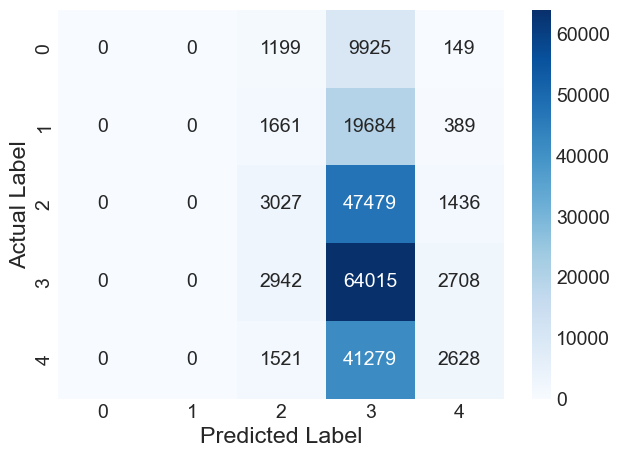

In [167]:
sns.heatmap(confusion_matrix(y_test,test_predictions2), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual Label')
_ = plt.xlabel('Predicted Label')